# Week 6: Encryption, Validation, Compression

## Contents
1. [Introduction](#Introduction)
2. [Encryption](#Encryption)
3. [Data Validation](#Data-Validation)
4. [Compression](#Compression)

In [106]:
import pprint
import random
from pathlib import Path

pp = pprint.PrettyPrinter(indent=4)

## Introduction
Data represented as binary.

In [9]:
# write a sample file to disk with some content
sample_file_path = Path("./sample_file")
sample_file_path.unlink(missing_ok=True)

phrase = "hello world"
with sample_file_path.open("w") as f:
    f.write(phrase)

print("wrote {} characters to {}".format(len(phrase), sample_file_path))

wrote 11 characters to sample_file


In [10]:
# terminal command to read contents of file and output it to stdout
!cat sample_file

hello world

In [6]:
# command to list files or directires
!ls -alh sample_file

-rw-r--r--  1 ryantanaka  staff    11B Feb 24 13:57 sample_file


In [21]:
# print the binary representation of our phrase "hello world"
for c in phrase:
    print("char: {}, decimal: {:<4}, binary: {}".format(c, ord(c), format(ord(c), "08b")))

char: h, decimal: 104 , binary: 01101000
char: e, decimal: 101 , binary: 01100101
char: l, decimal: 108 , binary: 01101100
char: l, decimal: 108 , binary: 01101100
char: o, decimal: 111 , binary: 01101111
char:  , decimal: 32  , binary: 00100000
char: w, decimal: 119 , binary: 01110111
char: o, decimal: 111 , binary: 01101111
char: r, decimal: 114 , binary: 01110010
char: l, decimal: 108 , binary: 01101100
char: d, decimal: 100 , binary: 01100100


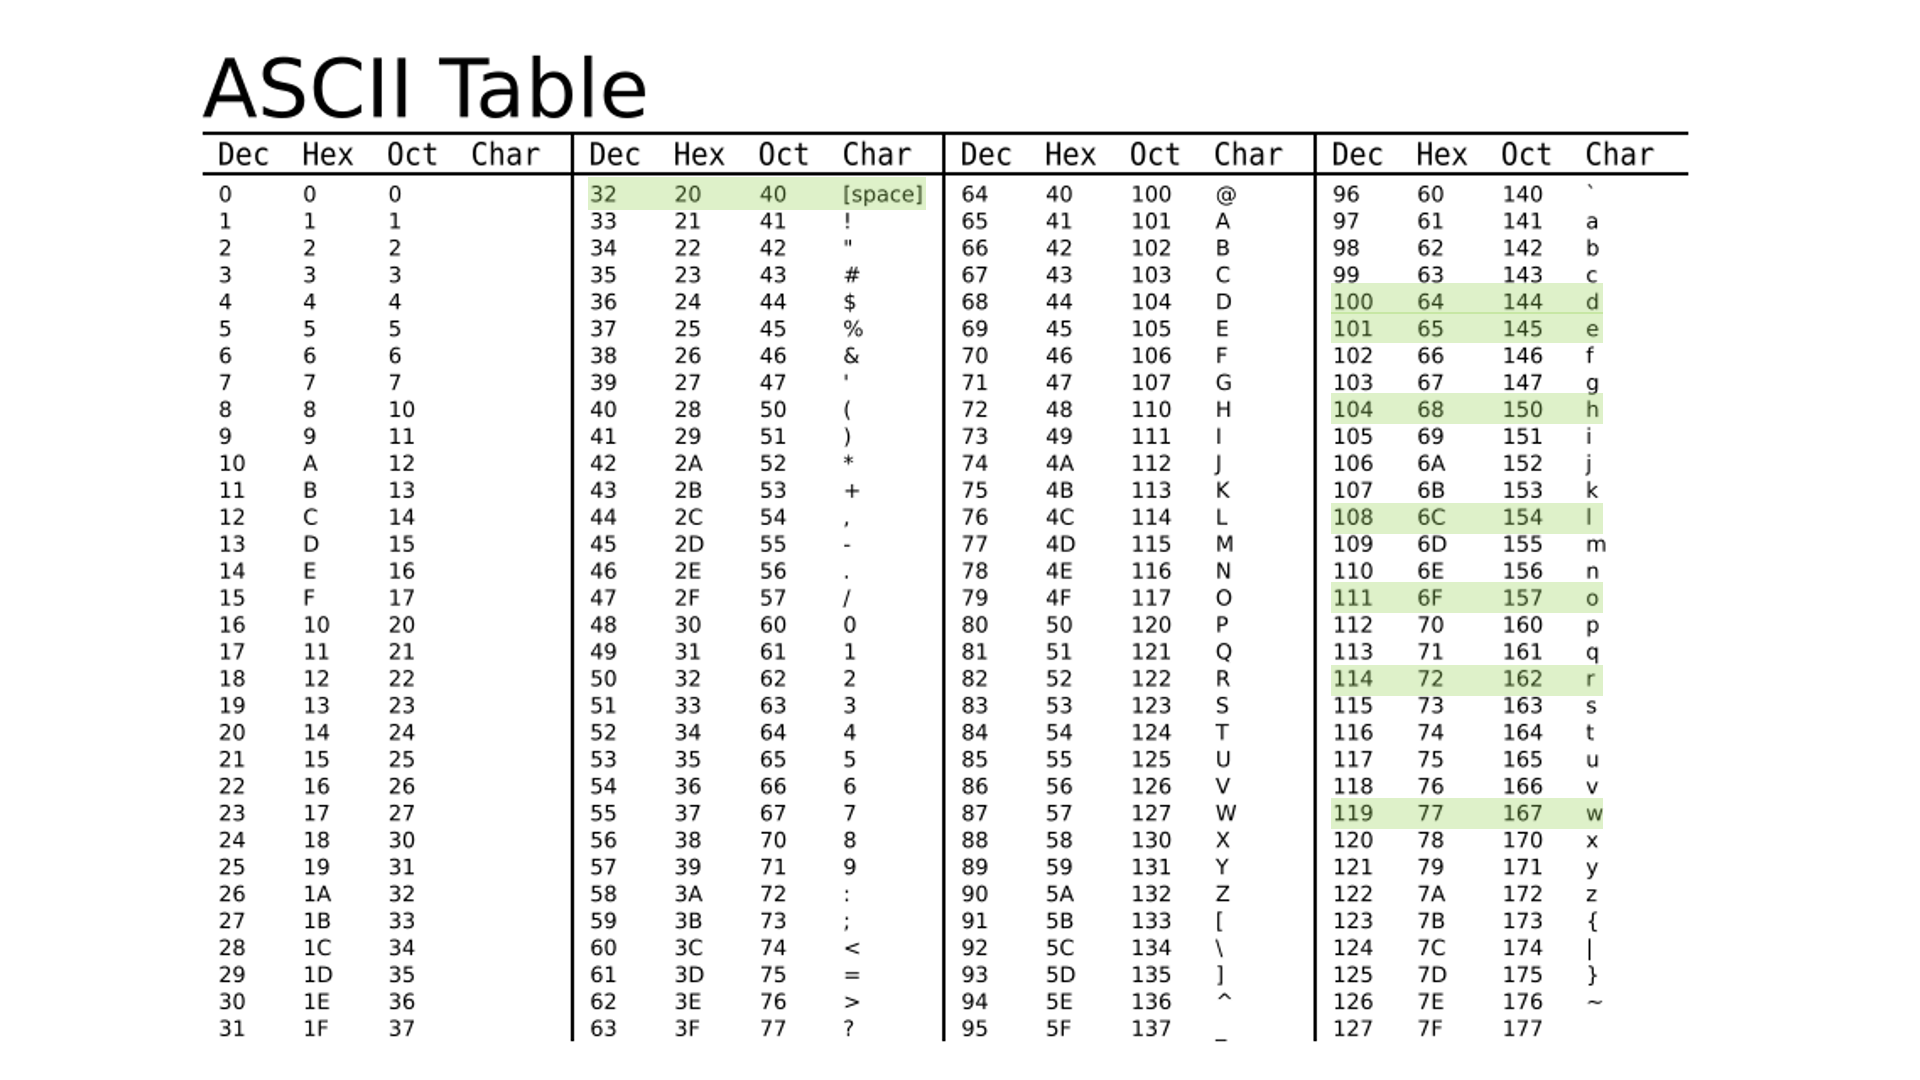

## Encryption
- introduce encryption (why use encryption? how strong is encryption)
- tools: gpg and zip
- encrypt using password
- encrypt files using private key
- aside: ransomware

### What is file encryption?

Encryption is a means to **ensure that our data is kept private**. File encryption is a way of encoding data such that it becomes unreadable. Decryption requires a key file or password.

In [10]:
# secret message that we should encrypt
secret_email_message = "this is a confidential email and my password is abc123"

In [11]:
# given a decimal number, return the corresponding character from the ascii table
chr(122)

'z'

In [16]:
# the opposite of above; given a character, return the corresponding decimal number from the ascii table 
ord("z")

122

In [13]:
# caesar cipher: character number in ascii table shifted n places (in this case up 1)
for i in range(32, 128):
    print("char: {}, shifted_char: {}".format(chr(i), chr(i+1)))

char:  , shifted_char: !
char: !, shifted_char: "
char: ", shifted_char: #
char: #, shifted_char: $
char: $, shifted_char: %
char: %, shifted_char: &
char: &, shifted_char: '
char: ', shifted_char: (
char: (, shifted_char: )
char: ), shifted_char: *
char: *, shifted_char: +
char: +, shifted_char: ,
char: ,, shifted_char: -
char: -, shifted_char: .
char: ., shifted_char: /
char: /, shifted_char: 0
char: 0, shifted_char: 1
char: 1, shifted_char: 2
char: 2, shifted_char: 3
char: 3, shifted_char: 4
char: 4, shifted_char: 5
char: 5, shifted_char: 6
char: 6, shifted_char: 7
char: 7, shifted_char: 8
char: 8, shifted_char: 9
char: 9, shifted_char: :
char: :, shifted_char: ;
char: ;, shifted_char: <
char: <, shifted_char: =
char: =, shifted_char: >
char: >, shifted_char: ?
char: ?, shifted_char: @
char: @, shifted_char: A
char: A, shifted_char: B
char: B, shifted_char: C
char: C, shifted_char: D
char: D, shifted_char: E
char: E, shifted_char: F
char: F, shifted_char: G
char: G, shifted_char: H


In [14]:
# encrypt message using secret key
encrypted_email_message = list()
for c in secret_email_message:
    encrypted_email_message.append(chr(ord(c)+1))
    print(chr(ord(c)+1), end="")
encrypted_email_message = "".join(encrypted_email_message)
print()

uijt!jt!b!dpogjefoujbm!fnbjm!boe!nz!qbttxpse!jt!bcd234


**Question**: What patterns do we notice in the encrypted message which provide hints about the actual message?

In [15]:
# decrypt message
for c in encrypted_email_message:
    print(chr(ord(c)-1), end="")
print()

this is a confidential email and my password is abc123


### Why is file encryption useful?
- protecting private information: personal data, intellectual property, confidential information, etc.
- preventing information from being leaked

### GPG: a Common Tool for Encryption

In [50]:
# create a sample file that we will encrypt
!echo "CI-COMPASS SIP CLASSIFIED INFORMATION" > sensitive_information.txt

In [51]:
# view the contents of our sensitive file
!cat sensitive_information.txt

CI-COMPASS SIP CLASSIFIED INFORMATION


In [62]:
# create a password that we will use to encrypt and decrypt sensitive_information.txt 
!echo "ENTER SECRET PASSWORD HERE" > pass.txt

In [63]:
!cat pass.txt

ENTER SECRET PASSWORD HERE


In [ ]:
# encrypt our sensitive information file using the password we have provided (which was placed in a file)
!gpg --batch -c --passphrase-file pass.txt sensitive_information.txt

In [ ]:
# try to inspect the contents of the encrypted file (sensitive_information.txt.gpg), can you read it?
!cat sensitive_information.txt.gpg

In [ ]:
# decrypt our sensitive information
!gpg --decrypt --batch --passphrase-file pass.txt sensitive_information.txt

## Data Validation

It's important to ensure that data has not been tampered with or corrupted while being stored or transferred. One way to do this is to use a **checksum**. 

The idea is to pass data through a **checksum function** which outputs a checksum, which is a small block of data derived from another block of data. After downloading the same piece of data, one can recreate the checksum using the checksum function and **compare that checksum to the original one** to verify data integrity. 

A good checksum function will produce vastly different checksum values for input data even if the smallest changes to that input data are made. 

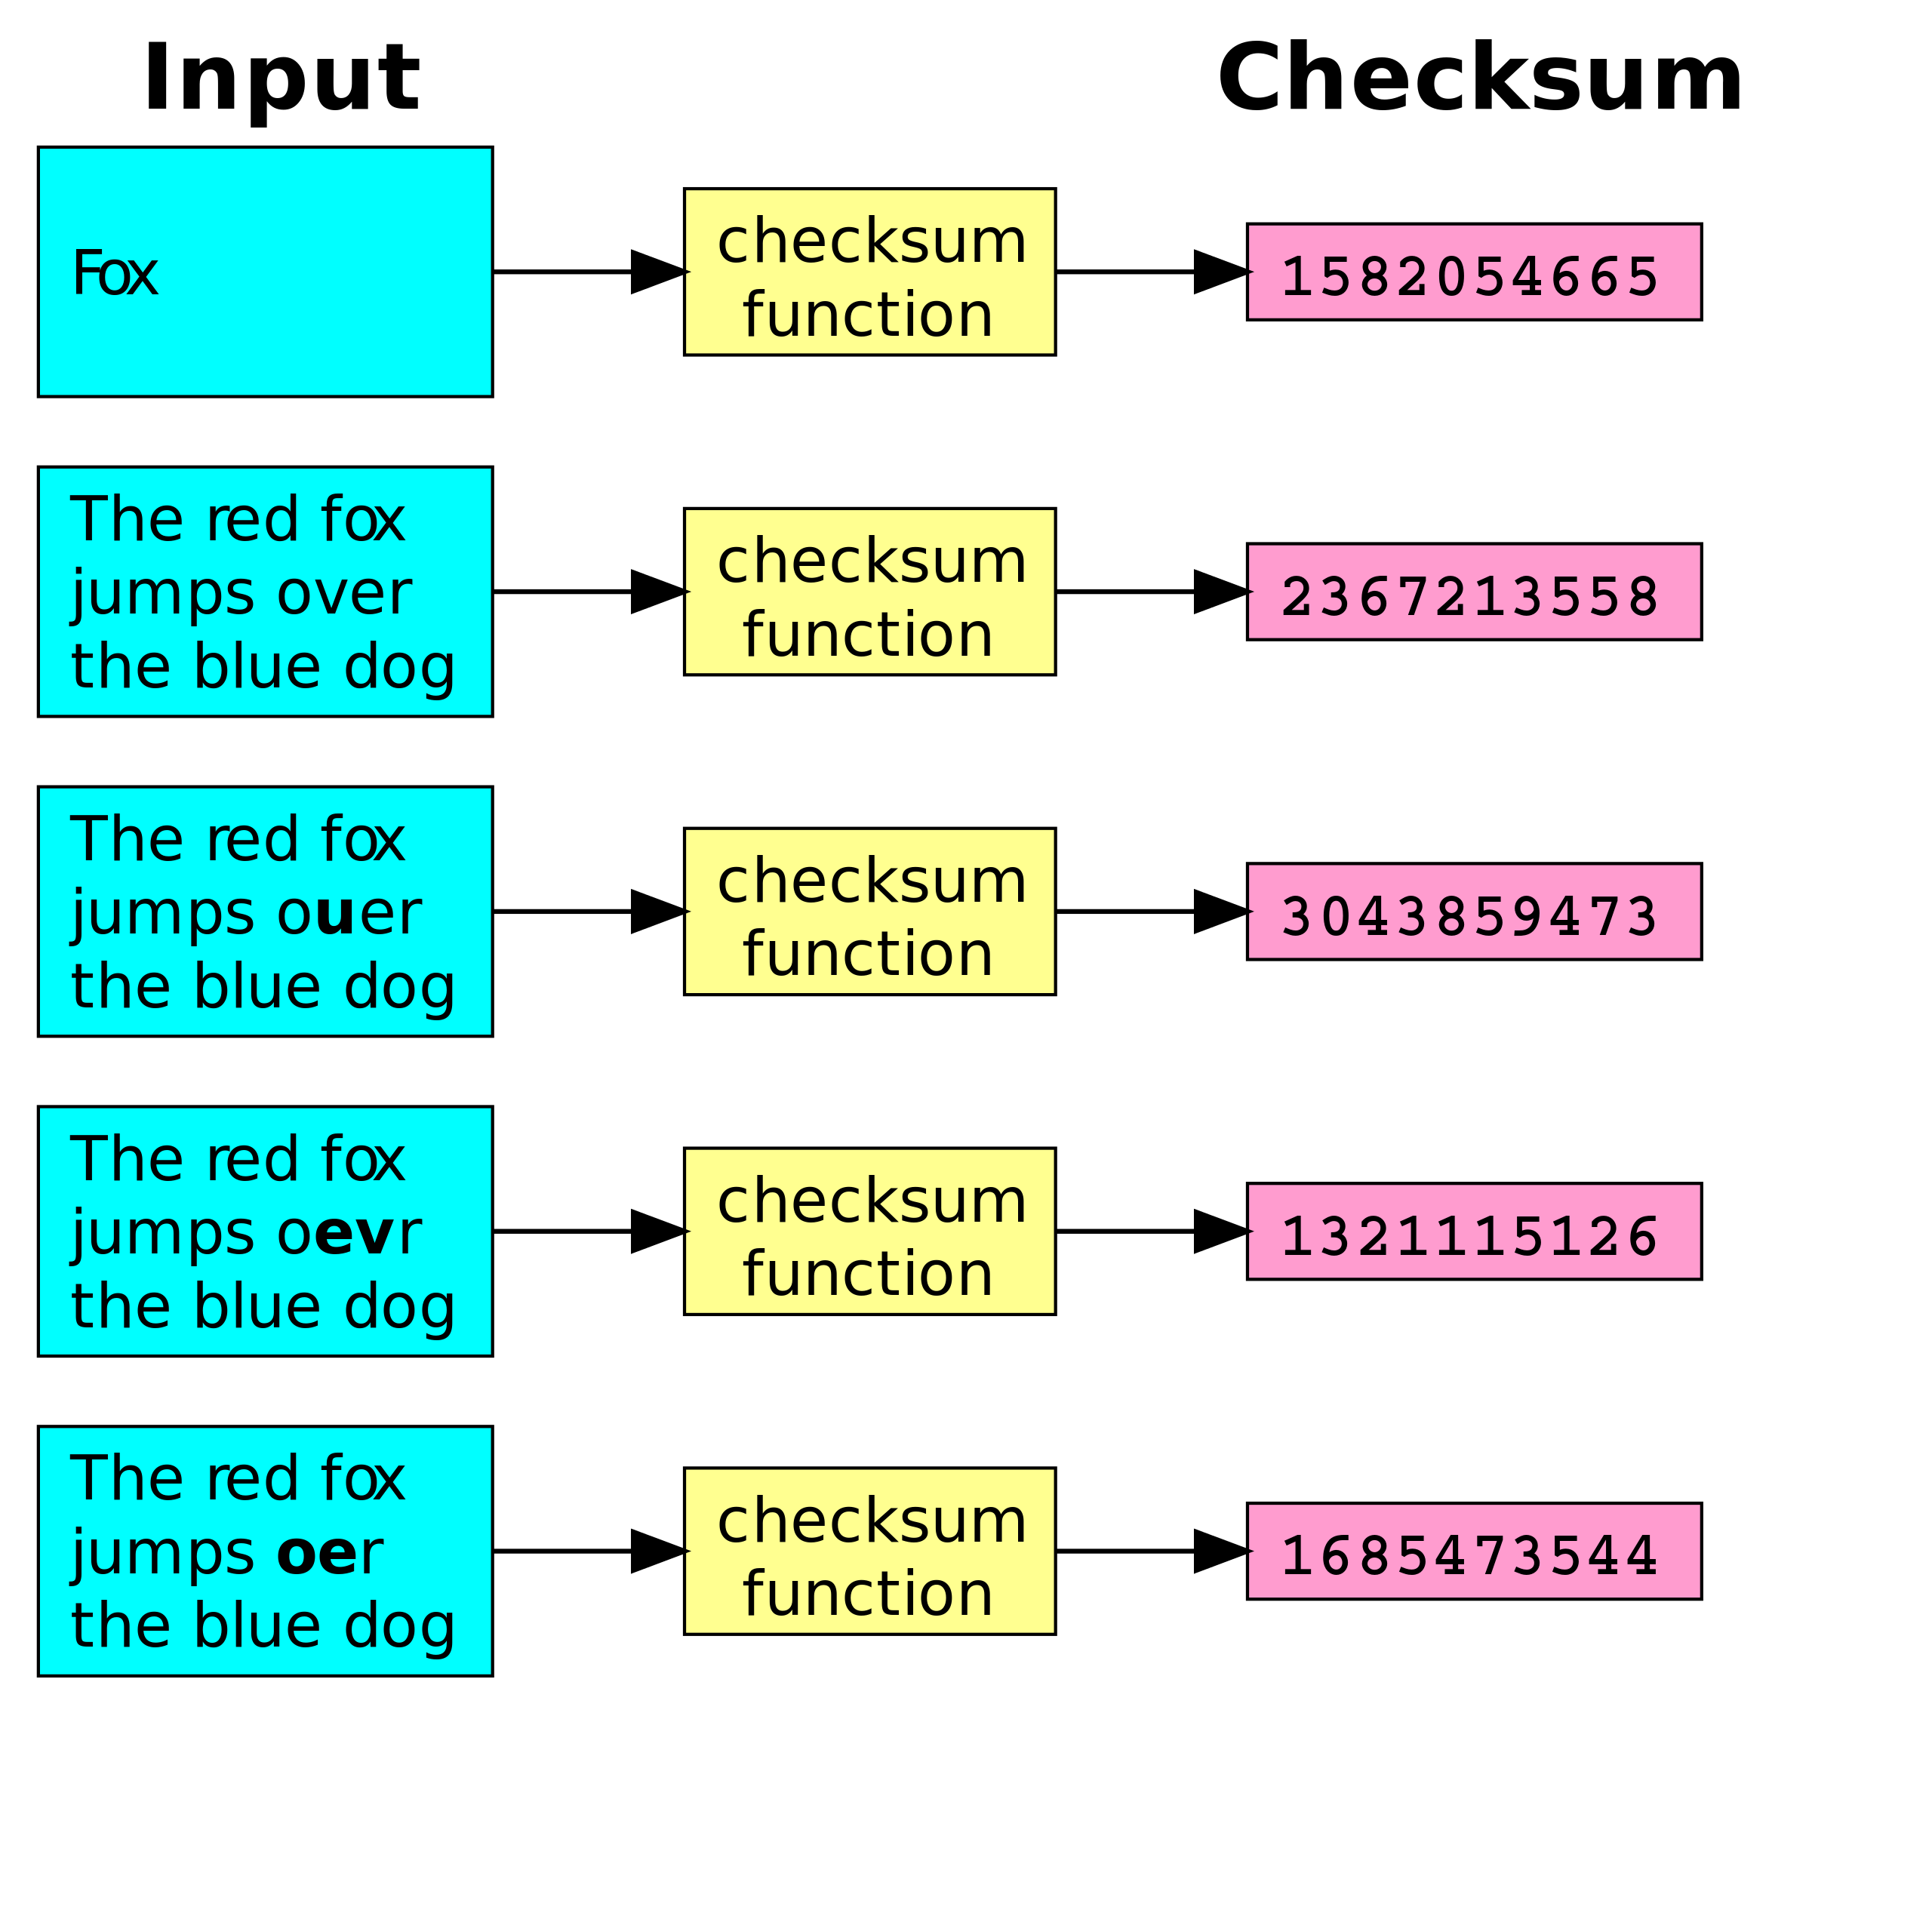
-https://en.wikipedia.org/wiki/Checksum#:~:text=A%20checksum%20is%20a%20small,upon%20to%20verify%20data%20authenticity.

## Compression

Compression provides us with a means to **reduce the amount of space needed to represent data**. The smaller our files are, the more files we can store, and the faster we can transport those files. 

Compression is a **space-time complexity trade off**. Spend extra compute time performing the compression to reduce data size. 

Compression works by looking at patterns in the data. 

**Question**: How might we compress the string "012233344445555555555555"? In other words, how can we represent the same string using less than the current number of characters in the string?

In [70]:
# basic compression example 
sample_text     = "012233344445555555555555" 
compressed_text = "00.11.22.33.44.135"

print(
    "len sample_text: {}, len compressed_text: {}, space savings: {}".format(
        len(sample_text), len(compressed_text), 1 - (len(compressed_text) / len(sample_text))))


len sample_text: 24, len compressed_text: 18, space savings: 0.25


### Lossy vs. Lossless Compression

Compression algorithms fall under two categories: **lossy** and **lossless**.

Lossless compression techniques are used for data where information cannot be lost as a result of the compression. For example, lossless compression techniques are good for documents and binary data. If we compress a bank account number, decompression should result in the exact same bank account number.


Lossy compression techniques are useful for images, videos, and audio because these media types can still be consumed, but at a lower quality (i.e. less data can be used to represent the same piece of media).

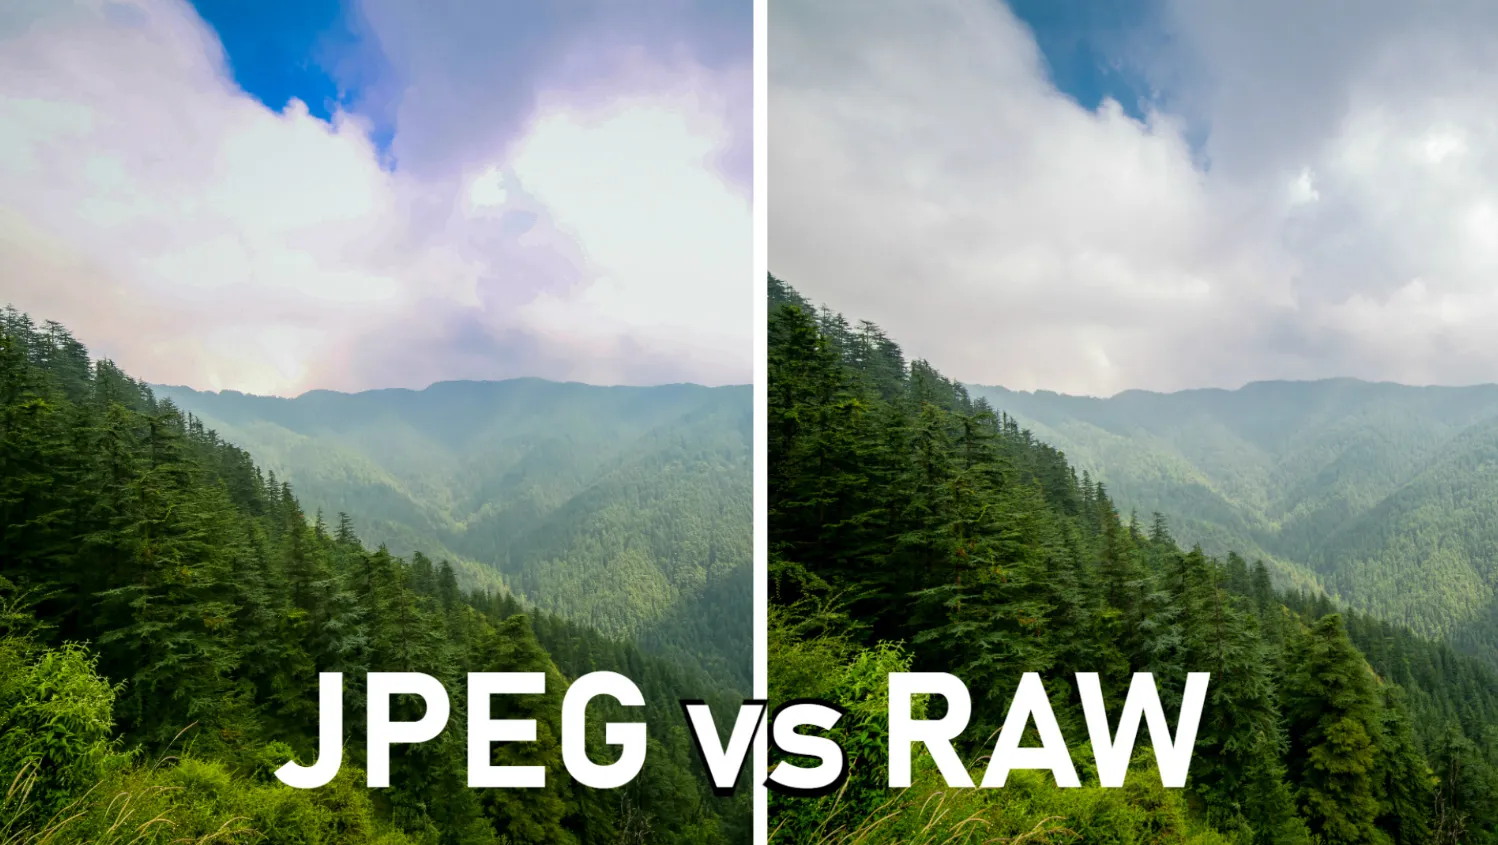

### Gzip: a Common Tool for Text File Compression 

A tool to compress text files, tar archives, and web pages. Gzip is not meant to compress media or binary files.

In [80]:
!gzip --verbose --kep untitled.txt

untitled.txt:	   87.3% -- replaced with untitled.txt.gz


In [83]:
!gzip --verbose --decompress untitled.txt.gz

untitled.txt.gz:	   87.3% -- replaced with untitled.txt


In [112]:
with open("random_txt_file.txt", "w") as f:
    lots_of_text = [chr(random.randint(56,127)) for _ in range(10<<20)]
    f.write("".join(lots_of_text))

In [7]:
!ls -alh 

total 39672
drwxr-xr-x  17 ryantanaka  staff   544B Feb 27 21:16 .
drwxr-xr-x  98 ryantanaka  staff   3.1K Feb 22 15:24 ..
drwxr-xr-x  12 ryantanaka  staff   384B Feb 27 21:06 .git
drwxr-xr-x   3 ryantanaka  staff    96B Feb 22 16:11 .ipynb_checkpoints
-rw-r--r--   1 ryantanaka  staff   100B Feb 27 20:50 file.txt
-rw-r--r--   1 ryantanaka  staff   211B Feb 24 18:20 file.zip
-rw-r--r--   1 ryantanaka  staff   951K Feb 27 21:16 notebook.ipynb
-rw-r--r--   1 ryantanaka  staff    27B Feb 25 10:30 pass.txt
-rw-r--r--   1 ryantanaka  staff    10M Feb 27 21:01 random_txt_file.txt
-rw-r--r--   1 ryantanaka  staff   7.8M Feb 27 21:01 random_txt_file.txt.gz
-rw-r--r--   1 ryantanaka  staff    11B Feb 24 14:09 sample_file
-rw-r--r--   1 ryantanaka  staff    38B Feb 25 10:13 sensitive_information.txt
-rw-r--r--   1 ryantanaka  staff   2.6K Feb 27 13:32 untitled.tar.gz
-rw-r--r--   1 ryantanaka  staff    19K Feb 27 13:31 untitled.txt
drwxr-xr-x   8 ryantanaka  staff   256B Feb 22 15:27 venv
-rw-r--

In [114]:
!time gzip --verbose --keep --fast random_txt_file.txt

random_txt_file.txt:	   20.7% -- replaced with random_txt_file.txt.gz

real	0m0.380s
user	0m0.300s
sys	0m0.028s


In [119]:
!rm -f random_txt_file.txt.gz
!time gzip --verbose --keep --best random_txt_file.txt

random_txt_file.txt:	   21.8% -- replaced with random_txt_file.txt.gz

real	0m0.333s
user	0m0.318s
sys	0m0.011s


In [1]:
!time gzip --verbose --keep --fast voldemort

voldemort:	   54.7% -- replaced with voldemort.gz

real	0m0.014s
user	0m0.006s
sys	0m0.003s


In [2]:
!rm -f voldemort.gz 
!time gzip --verbose --keep --best voldemort 

voldemort:	   62.1% -- replaced with voldemort.gz

real	0m0.038s
user	0m0.032s
sys	0m0.003s


In [5]:
!head -c 200 voldemort

Harry Potter and the Sorcerer's Stone


CHAPTER ONE

THE BOY WHO LIVED

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much. They

In [6]:
!head -c 200 voldemort.gz

�\�E�W�|��/ø��z���/���!�����������!<~x_���[�����ׇ�����_�8N�Że����)�}�/�V.��qS�66��x���g�Gq

In [73]:
!cat untitled.txt

                                                                                
  .  . .  .  . .  .  . .  .  . .  .  . .  .  . .  .  . .  .  . .  .  . .  .  .  
   .       .       .       .       .       .       .       .       .       .   .
     .  .    .  . .t  . .    .  .    .  .    .  .    .  .    .  .    .  .    .  
 .       .       tX.X     .      .       .       .       .       .       .      
   .  .    .  . 8.%X   .    . .    .  .    .  .    .  .    .  .    .  .    .  . 
  .    .  .    t S:;@.   .      .   .   .   .   .   .   .   .   .   .   .   .   
    .       . .XS:8@S      .  .   .   .   .   .   .   .   .   .   .   ..;.    . 
  .   . .    ..888@St  . .      .       .       .       .       .    t88t@ .    
    .     .  : 88888:.     . .     . .     . .   :X8S::S@X8  .     .8SSt8S.  .  
  .    .   . @ @888S;  .       .  .    . .:S@88888SX;t@8@ S    . :8@8t%;;@@.  . 
     .   .   @X8888@8t   .  .        .%88SSXSSXS8:;;tX@ X   .  ;8S8S:88@X8t.    
  .    .    .S88888S8; .   .

In [74]:
!ls -alh untitled.txt

-rw-r--r--  1 ryantanaka  staff    19K Feb 27 13:31 untitled.txt


In [76]:
!tar -czvf untitled.tar.gz untitled.txt

a untitled.txt


In [77]:
!ls -alh untitled.tar.gz

-rw-r--r--  1 ryantanaka  staff   2.6K Feb 27 13:32 untitled.tar.gz
